# Model
## load libraries and functions

In [2]:
# libraries ####
devtools::install_github("rstudio/keras")
install.packages("tidyverse")
# install.packages("gradDescent")
library(keras)
library(tidyverse)
#library(gradDescent)
## costum functions ####
create_matrix <- function(n_rows, n_cols) {
  # Generate a vector of random numbers between 0 and 1
  data <- runif(n_rows * n_cols)

  # Create a matrix from the vector
  matrix <- matrix(data, nrow = n_rows, ncol = n_cols)

# Normalize the matrix such that the sum of each column is 1
  for (i in 1:n_cols) {
    matrix[, i] <- matrix[, i] / sum(matrix[, i])
  }

  return(matrix)
}
min_max_scaling <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}



png         (NA  -> 0.1-8 ) [CRAN]
here        (NA  -> 1.0.1 ) [CRAN]
RcppTOML    (NA  -> 0.2.2 ) [CRAN]
Rcpp        (NA  -> 1.0.11) [CRAN]
reticulate  (NA  -> 1.32.0) [CRAN]
whisker     (0.4 -> 0.4.1 ) [CRAN]
config      (NA  -> 0.3.2 ) [CRAN]
tfautograph (NA  -> 0.3.2 ) [CRAN]
tfruns      (NA  -> 1.5.1 ) [CRAN]
zeallot     (NA  -> 0.1.0 ) [CRAN]
tensorflow  (NA  -> 2.13.0) [CRAN]


Installing 11 packages: png, here, RcppTOML, Rcpp, reticulate, whisker, config, tfautograph, tfruns, zeallot, tensorflow

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpxGvym1/remotes156598520bd/rstudio-keras-d8c9e28/DESCRIPTION’ ... OK
* preparing ‘keras’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘keras/man-roxygen’
* building ‘keras_2.13.0.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# load data ####
tissue_bulk_data <- read.csv("bulk_tissue_data.csv")
data <- tissue_bulk_data #[c(1:5,c(17276:17279)),1:5]
tail(data)
## preprocess data --- scale ####
split_gene_features <- data[c(1:17275),-1]
tail(split_gene_features)


,ensembl_gene_id,GSM86787,GSM86788,GSM86789,GSM86790,GSM86791,GSM86792,GSM86793,GSM86794,GSM86795,⋯,GSM87114,GSM87115,GSM87116,GSM87117,GSM87118,GSM87119,GSM87120,GSM87121,GSM87122,GSM87123
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17275,ENSG00000264063,6801.531514,4429.659722,4950.165634,7072.423633,4616.411884,3878.322864,5081.994179,3926.688791,4270.569187,⋯,2185.985749,2178.894532,2783.373021,1416.173419,372.393646,2189.782862,1765.817222,1997.441205,3318.636699,2061.247972
17276,condition,control,HD,control,HD,control,HD,control,HD,control,⋯,HD,HD,HD,HD,HD,HD,HD,HD,HD,HD
17277,condition_specified,control,grade 2,control,grade 3,control,grade 1,control,grade 1,control,⋯,grade 1,grade 2,grade 0,grade 2,grade 2,grade 1,grade 2,grade 1,grade 2,grade 1
17278,age,37,70,68,40,29,64,75,69,22,⋯,65,50,70,63,47,42,45,70,74,46
17279,sex,M,M,M,M,M,M,M,F,M,⋯,F,F,F,F,M,F,F,F,M,M
17280,source_name_ch1,Caudate Nucleus,Caudate Nucleus,Caudate Nucleus,Caudate Nucleus,Caudate Nucleus,Caudate Nucleus,Caudate Nucleus,Caudate Nucleus,Caudate Nucleus,⋯,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum


,GSM86787,GSM86788,GSM86789,GSM86790,GSM86791,GSM86792,GSM86793,GSM86794,GSM86795,GSM86796,⋯,GSM87114,GSM87115,GSM87116,GSM87117,GSM87118,GSM87119,GSM87120,GSM87121,GSM87122,GSM87123
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17270,73.23098667,70.00282978,41.93462495,50.47247914,90.64499841,84.42791171,87.93908801,57.341825,79.13125544,87.63215951,⋯,54.84021668,50.31019093,60.60705628,35.73655426,22.10625279,53.49701417,45.95614776,33.97938998,33.72024407,45.23983768
17271,39.62703851,74.62911586,53.4715984,44.14020841,64.60657731,67.70037423,42.75552271,48.22713889,53.27242302,51.31385409,⋯,91.46808451,80.52591083,69.95286219,104.2188227,105.9514732,93.36954174,55.80523852,51.18739671,72.52164861,86.98749683
17272,6801.531514,4429.659722,4950.165634,7072.423633,4616.411884,3878.322864,5081.994179,3926.688791,4270.569187,6969.30296,⋯,2185.985749,2178.894532,2783.373021,1416.173419,372.393646,2189.782862,1765.817222,1997.441205,3318.636699,2061.247972
17273,6801.531514,4429.659722,4950.165634,7072.423633,4616.411884,3878.322864,5081.994179,3926.688791,4270.569187,6969.30296,⋯,2185.985749,2178.894532,2783.373021,1416.173419,372.393646,2189.782862,1765.817222,1997.441205,3318.636699,2061.247972
17274,6801.531514,4429.659722,4950.165634,7072.423633,4616.411884,3878.322864,5081.994179,3926.688791,4270.569187,6969.30296,⋯,2185.985749,2178.894532,2783.373021,1416.173419,372.393646,2189.782862,1765.817222,1997.441205,3318.636699,2061.247972
17275,6801.531514,4429.659722,4950.165634,7072.423633,4616.411884,3878.322864,5081.994179,3926.688791,4270.569187,6969.30296,⋯,2185.985749,2178.894532,2783.373021,1416.173419,372.393646,2189.782862,1765.817222,1997.441205,3318.636699,2061.247972


In [5]:
### convert to binary
binary_sex <- ifelse(data[17279,-1 ] == "F", 1, 0)
binary_condition <- ifelse(data[17276,-1 ] == "control", 0, 1)
binary_sex


,GSM86787,GSM86788,GSM86789,GSM86790,GSM86791,GSM86792,GSM86793,GSM86794,GSM86795,GSM86796,⋯,GSM87114,GSM87115,GSM87116,GSM87117,GSM87118,GSM87119,GSM87120,GSM87121,GSM87122,GSM87123
17279,0,0,0,0,0,0,0,1,0,0,⋯,1,1,1,1,0,1,1,1,0,0


In [6]:
scale_genes <- t(scale(t(data.matrix(split_gene_features))))
#scale_genes <- sapply(t(data.matrix(split_gene_features)),min_max_scaling)
# (colnames(split_gene_features) == colnames(binary_sex) ) == colnames(binary_condition)
head(scale_genes)
x_original <- rbind(scale_genes,binary_sex,binary_condition)

,GSM86787,GSM86788,GSM86789,GSM86790,GSM86791,GSM86792,GSM86793,GSM86794,GSM86795,GSM86796,⋯,GSM87114,GSM87115,GSM87116,GSM87117,GSM87118,GSM87119,GSM87120,GSM87121,GSM87122,GSM87123
1,-0.5870559,0.3771656,-0.9221756,-1.6185020,0.11629402,0.2778337,-0.26196978,-0.55093523,-0.07534626,0.1965622,⋯,-0.3151475,-0.94525267,-0.5629755,0.08519010,0.5868662,0.08318339,-0.4305330,0.5898763,-0.5158179,0.20960578
2,-0.2882194,0.5739242,-0.1415822,-0.2923793,-0.83212900,0.5250451,0.22969074,-0.27781957,-0.12078257,-0.8331690,⋯,1.3934285,0.56144441,1.4038283,1.08455443,0.6935219,0.41376723,1.2031122,1.8478999,1.6908629,1.65342357
3,-0.3982440,0.6170205,-0.6919505,0.2061137,-0.36153065,-0.1836123,0.24565116,-0.17231585,-0.49355739,0.2498873,⋯,0.4263937,-0.05793974,0.1348052,0.04655201,0.2456512,-0.12713023,-0.2245617,0.5824253,-0.0650000,-0.36011860
4,0.7291401,3.0609584,0.6708589,-0.7473163,0.04119366,1.6759234,0.76799417,0.06633456,-0.45076800,0.3628829,⋯,-0.8318812,-1.84951616,0.1994670,-1.21013741,1.8319113,-0.57361557,-0.6033275,0.1314723,-0.1176511,-1.04957849
5,-0.1774781,0.1942992,0.1084580,-0.2421613,0.35933209,-0.4706683,0.52678301,-0.35460123,-0.04267101,-0.2367206,⋯,0.1840225,-1.38348736,-1.4584473,-0.01123618,0.3278973,0.18946311,0.1562147,-0.0196994,-0.9657668,0.51650624
6,0.9441752,2.7498092,1.0634738,0.5402997,0.45579657,-0.3668667,0.09914347,0.71427687,-0.95714622,-1.0130674,⋯,1.0224649,-0.67256935,0.2159567,1.81281815,1.2536060,-0.17176377,-1.1733749,1.7519262,1.3927877,-0.05743594


In [ ]:
#scale_minmax <- minmaxScaling(t(data.matrix(split_gene_features)))
# head(scale_minmax)

ERROR: ignored

In [7]:
tail(x_original)

,GSM86787,GSM86788,GSM86789,GSM86790,GSM86791,GSM86792,GSM86793,GSM86794,GSM86795,GSM86796,⋯,GSM87114,GSM87115,GSM87116,GSM87117,GSM87118,GSM87119,GSM87120,GSM87121,GSM87122,GSM87123
17272,1.413074,0.3372961,0.5258924,1.520349,0.3792544,-0.05460377,0.8226289,-0.02302685,0.2447281,1.550628,⋯,-1.352285,-1.357476,-0.8487849,-2.369235,0.0574294,-1.40722,-1.989014,-1.664594,-0.3573961,-1.484649
17273,1.413074,0.3372961,0.5258924,1.520349,0.3792544,-0.05460377,0.8226289,-0.02302685,0.2447281,1.550628,⋯,-1.352285,-1.357476,-0.8487849,-2.369235,0.0574294,-1.40722,-1.989014,-1.664594,-0.3573961,-1.484649
17274,1.413074,0.3372961,0.5258924,1.520349,0.3792544,-0.05460377,0.8226289,-0.02302685,0.2447281,1.550628,⋯,-1.352285,-1.357476,-0.8487849,-2.369235,0.0574294,-1.40722,-1.989014,-1.664594,-0.3573961,-1.484649
17275,1.413074,0.3372961,0.5258924,1.520349,0.3792544,-0.05460377,0.8226289,-0.02302685,0.2447281,1.550628,⋯,-1.352285,-1.357476,-0.8487849,-2.369235,0.0574294,-1.40722,-1.989014,-1.664594,-0.3573961,-1.484649
17279,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.00000000,0.0000000,1.00000000,0.0000000,0.000000,⋯,1.000000,1.000000,1.0000000,1.000000,0.0000000,1.00000,1.000000,1.000000,0.0000000,0.000000
17276,0.000000,1.0000000,0.0000000,1.000000,0.0000000,1.00000000,0.0000000,1.00000000,0.0000000,0.000000,⋯,1.000000,1.000000,1.0000000,1.000000,1.0000000,1.00000,1.000000,1.000000,1.0000000,1.000000


In [8]:
# Create a matrix with random numbers
number_of_cell_types = 4
number_of_samples = dim(x_original)[2] # number of patients
y_original <- create_matrix(number_of_cell_types,number_of_samples)

# Normalize the columns to sum to 1
y_original <- y_original / colSums(y_original)

In [9]:
y_original

0.3005219,0.06286739,0.1144142,0.26105664,0.3634455,0.2709191,0.1954991,0.12374753,0.2640432,0.1680478,⋯,0.4227791,0.4821459,0.01574743,0.04043870,0.453304358,0.23163121,0.1796879,0.16296353,0.25921103,0.1298459
0.2744465,0.35992914,0.2080723,0.27879056,0.1587834,0.2406196,0.3180666,0.32729822,0.2680022,0.3316766,⋯,0.1947519,0.1013303,0.50177183,0.06005318,0.178839716,0.34734500,0.4122310,0.30452535,0.37570340,0.2605230
0.1734829,0.15189291,0.3239901,0.06696556,0.3224622,0.2736012,0.2839666,0.04541374,0.3240809,0.1888204,⋯,0.3676159,0.1135697,0.29847368,0.46874068,0.364997747,0.36069717,0.1236906,0.06172165,0.35387207,0.1540119
0.2515487,0.42531056,0.3535234,0.39318724,0.1553090,0.2148602,0.2024676,0.50354050,0.1438737,0.3114552,⋯,0.0148532,0.3029541,0.18400707,0.43076745,0.002858178,0.06032662,0.2843905,0.47078947,0.01121351,0.4556192


In [10]:
# build the model ####

x <- x_original
y <- y_original
tissue_composition <- dim(y)[1]
number_of_features <- dim(x)[1]
dim(x)
dim(y)
tissue_composition

[1] 17277   201

[1]   4 201

[1] 4

In [11]:
# Assuming you have a dataset 'data' with features 'x' and labels 'y'
x <- t(x)
y <- t(y)
# Set a random seed for reproducibility
set.seed(123)

# Define the proportion of data to use for testing (e.g., 20%)
test_split_ratio <- 0.2

# Generate random indices for splitting the data
num_samples <- nrow(x)
num_test_samples <- round(num_samples * test_split_ratio)
test_indices <- sample(1:num_samples, num_test_samples)

# Split the data into training and test sets
x_train <- x[-test_indices, ]  # Training features
y_train <- y[-test_indices, ]  # Training labels
x_test <- x[test_indices, ]    # Test features
y_test <- y[test_indices, ]    # Test labels

# Now you have x_train, y_train for training, and x_test, y_test for testing


In [12]:

# Initialize model
model <- keras_model_sequential()


In [27]:
dim(x_original)[1]

[1] 17277

In [13]:

# Add layers
feature_factor = 1
model %>%
  layer_dense(units = feature_factor*number_of_features, activation = 'sigmoid', input_shape = dim(x)[2]) %>% # units=265 relu
  layer_dropout(rate = 0.4) %>%
  layer_dense(units = 128, activation = 'sigmoid') %>% #units = 128 relu
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = tissue_composition, activation = 'softmax')


In [14]:
tissue_composition
dim(x)[2]

[1] 4

[1] 201

In [15]:

# Compile model
model %>% compile(
  loss = 'categorical_crossentropy', # binary_crossentropy #
  optimizer = optimizer_rmsprop(),#optimizer_rmsprop(),
  metrics = c('accuracy')
)


In [31]:
head(x)

,1,2,3,4,5,6,7,8,9,10,⋯,17268,17269,17270,17271,17272,17273,17274,17275,17279,17276
GSM86787,-0.5870559,-0.2882194,-0.3982440,0.72914006,-0.1774781,0.9441752,-0.7039495,-0.4188320,0.18484680,-0.43931709,⋯,0.5864208,0.7232639,0.7232639,-1.3818818,1.41307404,1.41307404,1.41307404,1.41307404,0,0
GSM86788,0.3771656,0.5739242,0.6170205,3.06095836,0.1942992,2.7498092,-0.4738126,-0.6804174,-0.17158180,-1.11369996,⋯,0.8124428,0.6408327,0.6408327,0.5948118,0.33729605,0.33729605,0.33729605,0.33729605,0,1
GSM86789,-0.9221756,-0.1415822,-0.6919505,0.67085889,0.1084580,1.0634738,-1.0253636,-0.6210726,-0.19159963,0.04855018,⋯,1.0981187,-0.7431015,-0.7431015,-0.4172324,0.52589243,0.52589243,0.52589243,0.52589243,0,0
GSM86790,-1.6185020,-0.2923793,0.2061137,-0.74731633,-0.2421613,0.5402997,-0.8642863,-1.2668373,0.17122355,-0.37061387,⋯,0.9909627,-0.2555557,-0.2555557,-1.0295334,1.52034904,1.52034904,1.52034904,1.52034904,0,1
GSM86791,0.1162940,-0.8321290,-0.3615306,0.04119366,0.3593321,0.4557966,1.3824649,0.2136582,0.05945733,1.04586298,⋯,1.2088099,1.3160235,1.3160235,0.1476740,0.37925442,0.37925442,0.37925442,0.37925442,0,0
GSM86792,0.2778337,0.5250451,-0.1836123,1.67592343,-0.4706683,-0.3668667,-0.4134549,-0.5796875,0.17233565,0.06690411,⋯,-1.6658454,1.1118094,1.1118094,0.2965604,-0.05460377,-0.05460377,-0.05460377,-0.05460377,0,1


In [32]:
head(y)

0.29187758,0.1922751,0.02560702,0.490240297
0.56716862,0.1997254,0.05003137,0.183074620
0.12673000,0.1764666,0.35375986,0.343043554
0.56065028,0.3459840,0.09138526,0.001980422
0.05786671,0.2626337,0.53086170,0.148637848
0.12183506,0.1041942,0.41696437,0.357006349


In [20]:
# Train model
history <- model %>% fit(
  x_train,
  y_train,
  epochs = 100, #30
  batch_size = 32, # 32
  #validation_split = 0.2
)

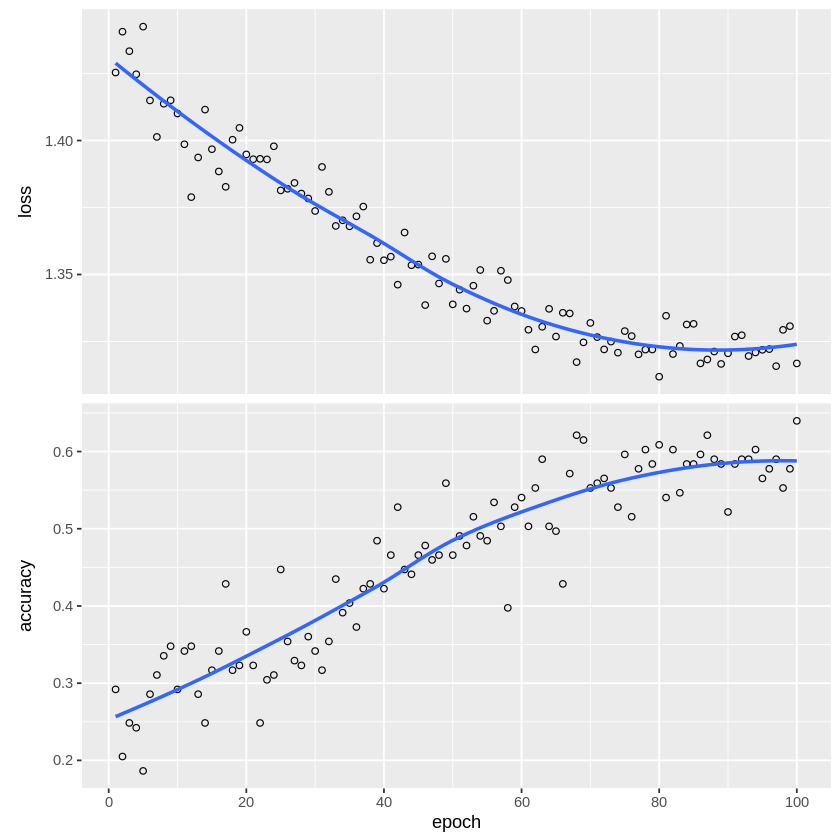

In [21]:
plot(history)


In [25]:
# Evaluate model
model %>% evaluate(x_test, y_test)

# Make predictions
predictions <- model %>% predict(x_test) %>% k_argmax()

loss accuracy 
1.440935 0.125000

In [ ]:
# process and prepare bulk for pipeline
data_bulk <- read.csv("bulk_tissue_data.csv")
genes_in_singleCell <- tissue_bulk_data$ensembl_gene_id[c(11,5,9,8)]
genes_filter_bulk <- data_bulk %>% filter(ensembl_gene_id %in% genes_in_singleCell)
matched_gene_order_bulk <- genes_filter_bulk %>% arrange(match(ensembl_gene_id,genes_in_singleCell))
# remove ensembl
split_gene_features <- matched_gene_order_bulk[,-1]
### convert to binary
binary_sex <- ifelse(data_bulk[17276,] == "F", 1, 0)[,-1]
binary_condition <- ifelse( data_bulk[17279,] == "control", 0, 1)[,-1]

# scale
scale_genes <- t(scale(t(data.matrix(split_gene_features))))
head(scale_genes)
head(binary_sex)
head(binary_condition)
bulk_genes_filtered <- rbind(scale_genes,binary_sex,binary_condition)
bulk_genes_filtered

GSM86787,GSM86788,GSM86789,GSM86790,GSM86791,GSM86792,GSM86793,GSM86794,GSM86795,GSM86796,⋯,GSM87114,GSM87115,GSM87116,GSM87117,GSM87118,GSM87119,GSM87120,GSM87121,GSM87122,GSM87123
1.746444,1.746444,1.746444,1.7464444,-0.7026392,1.746444,-0.7026392,1.746444,-0.7026392,-0.7026392,⋯,-0.7026392,0.1137220,0.1137220,-0.7026392,0.1137220,0.1137220,0.1137220,0.1137220,-0.7026392,-0.7026392
-1.217560,-1.217560,-1.217560,-1.2175601,0.7247382,-1.217560,0.7247382,-1.217560,0.7247382,0.7247382,⋯,-1.2175601,0.7247382,0.7247382,-1.2175601,0.7247382,0.7247382,0.7247382,0.7247382,-1.2175601,-1.2175601
-0.969036,-0.969036,-0.969036,0.1130542,0.1130542,-0.969036,0.1130542,-0.969036,0.1130542,0.1130542,⋯,2.2772347,-0.9690360,-0.9690360,2.2772347,-0.9690360,-0.9690360,-0.9690360,-0.9690360,2.2772347,2.2772347
-1.061893,-1.061893,-1.061893,-2.7831872,0.6594013,-1.061893,0.6594013,-1.061893,0.6594013,0.6594013,⋯,-1.0618929,0.6594013,0.6594013,-1.0618929,0.6594013,0.6594013,0.6594013,0.6594013,-1.0618929,-1.0618929


GSM86787 GSM86788 GSM86789 GSM86790 GSM86791 GSM86792 
       0        0        0        0        0        0

GSM86787 GSM86788 GSM86789 GSM86790 GSM86791 GSM86792 
       1        1        1        1        1        1

,GSM86787,GSM86788,GSM86789,GSM86790,GSM86791,GSM86792,GSM86793,GSM86794,GSM86795,GSM86796,⋯,GSM87114,GSM87115,GSM87116,GSM87117,GSM87118,GSM87119,GSM87120,GSM87121,GSM87122,GSM87123
,1.746444,1.746444,1.746444,1.7464444,-0.7026392,1.746444,-0.7026392,1.746444,-0.7026392,-0.7026392,⋯,-0.7026392,0.1137220,0.1137220,-0.7026392,0.1137220,0.1137220,0.1137220,0.1137220,-0.7026392,-0.7026392
,-1.217560,-1.217560,-1.217560,-1.2175601,0.7247382,-1.217560,0.7247382,-1.217560,0.7247382,0.7247382,⋯,-1.2175601,0.7247382,0.7247382,-1.2175601,0.7247382,0.7247382,0.7247382,0.7247382,-1.2175601,-1.2175601
,-0.969036,-0.969036,-0.969036,0.1130542,0.1130542,-0.969036,0.1130542,-0.969036,0.1130542,0.1130542,⋯,2.2772347,-0.9690360,-0.9690360,2.2772347,-0.9690360,-0.9690360,-0.9690360,-0.9690360,2.2772347,2.2772347
,-1.061893,-1.061893,-1.061893,-2.7831872,0.6594013,-1.061893,0.6594013,-1.061893,0.6594013,0.6594013,⋯,-1.0618929,0.6594013,0.6594013,-1.0618929,0.6594013,0.6594013,0.6594013,0.6594013,-1.0618929,-1.0618929
binary_sex,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
binary_condition,1.000000,1.000000,1.000000,1.0000000,1.0000000,1.000000,1.0000000,1.000000,1.0000000,1.0000000,⋯,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000


In [2]:
predictions_real <- model %>% predict(t(bulk_genes_filtered))

ERROR: ignored

ERROR: ignored

In [43]:
head(model %>% predict(t(x)) %>%apply(1, which.max) )

[1] 3 3 3 3 1 3

In [28]:
predictions = model %>% predict(x_train)
head(predictions)
head(model %>% predict(x_train)) %>% apply(1, sum)

0.3250034,0.2756130,0.1996621,0.1997216
0.1847293,0.2254596,0.1870659,0.4027453
0.1861390,0.1767752,0.3084390,0.3286468
0.1692764,0.2143226,0.1897616,0.4266394
0.3535629,0.1452778,0.2768745,0.2242848
0.3481315,0.1826634,0.2653012,0.2039039


[1] 1 1 1 1 1 1

In [31]:
head(y_train)
head(y_train %>% apply(1, sum))

0.30052193,0.2744465,0.17348288,0.2515487
0.06286739,0.3599291,0.15189291,0.4253106
0.11441421,0.2080723,0.32399005,0.3535234
0.26105664,0.2787906,0.06696556,0.3931872
0.36344545,0.1587834,0.32246217,0.1553090
0.27091909,0.2406196,0.27360116,0.2148602


[1] 1 1 1 1 1 1